## Mervyn Chan 2019 May 5th
# This page shows the results of k-fold cross validation analysis for a network trained on 1758 magnetorotational supernova waveforms from 
   
   https://zenodo.org/record/201145#.XGNwkXUzbCL
   
# and 21 neutrino driven waveforms from

   https://sntheory.org/ottetal2013
   
   https://sntheory.org/murphyetal2009
   
   https://sntheory.org/ott2009
      

## Data 

### 1. 50000 samples of whitened time series where 24906 (each waveform was scaled to optimal SNR = 5 and repeated 14 times with different noise realisations) samples contained signals + noise, and the rest only noise.
### 2. The initial time was randomised.

## Procedure 

### 1. 2000 random samples out of 50000 samples were drawn as validation data set, which the network never got to see during training.
### 2. the rest 48000 samples then went through a 10-fold cross validation analysis where 10% of the samples (4800) took turn to be the test dataset.
### 3. during the training process, the network was trained on training data and validated on validation data (2000) and tested against test data (4800).
### 4. The network was trained 10 times (10-fold). 


## Results (There is also a title for each of the plots below)

### The results are shown using a number of plots below, in the following order:

### 1. ROC curves of the CNN network for SNR = 5. 
### 2. Confusion matrix for a test dataset containing samples randomly drawn from only the rotational waveform dataset which the network did not get to see during training.
### 3. Confusion matrix for a test dataset containing samples randomly drawn from only the neutrino driven waveform dataset which the network did not get to see during training.
### 4. Confusion matrix for a test dataset containing randomly drawn samples from the entire dataset which the network did not get to see during training.
### 5. Plots of loss / validation loss; accuracy / validation accuracy. 


## Discussion

### Compared to "Apirl-8-2019-k-fold-results-for--window-applied-random-inital-time-1736waveforms", there are the following differences.
https://github.com/manleongchan/SNeML/blob/master/Apirl-8-2019-k-fold-results-for--window-applied-random-inital-time-1736waveforms.ipynb

### 1. The data set contained not only magnetorotational waveforms but also neutrino driven waveforms.
### 2. A tukey window with alpha = 0.1 (it was 0.5 previously) was applied to every waveform before adding noise and before extending the length for randomised initial start time.

### Compared to the results presented on "Apirl-8-2019-k-fold-results-for--window-applied-random-inital-time-1736waveforms", 
### the performance of the network is worse as indicated by Figure 1.
### There are two reasons for this:
### 1. the smaller value of alpha made the waveform amplitudes more evenly spread throughout the waveform so the CNN could not rely on higher peaks/amplitudes to pick up the signals for the              same SNR.
### 2. the number of neutrino driven waveforms was too small for the CNN to generalise. There were only 21 x 14 = 294 samples. It was hard for the network to pick up these signals.
### This is reflected by Figure 2, 3 and 4, where two confusion matrices show the performance of the CNN for different samples.
### Also, Figure 3 suggests that the CNN often mistook neutrino signals for background noise. 
### This is because in the data set, the neutrino driven waveforms were usually longer than rotational waveforms. 
### As a result, the amplitudes of the neutrino driven waveforms tend to be weaker than that of rotational waveforms for the same SNR making them even harder to identify.




In [35]:
import numpy as np
#import matplotlib
#matplotlib.use('Qt4Agg')

import matplotlib.pyplot as plt
from scipy import integrate, interpolate, signal, optimize, stats
import pickle
from sklearn import metrics
import itertools

np.set_printoptions(edgeitems=30, linewidth=160)

In [2]:
#load the data
with open("twosetswaveformSNR5randombegin.pkl") as f:
    tscores, history, signal_preds, test_label_saver_for_ROC, model, wf3 = pickle.load(f)

Using TensorFlow backend.


# 1. ROC curves of the CNN network for SNR = 5. 

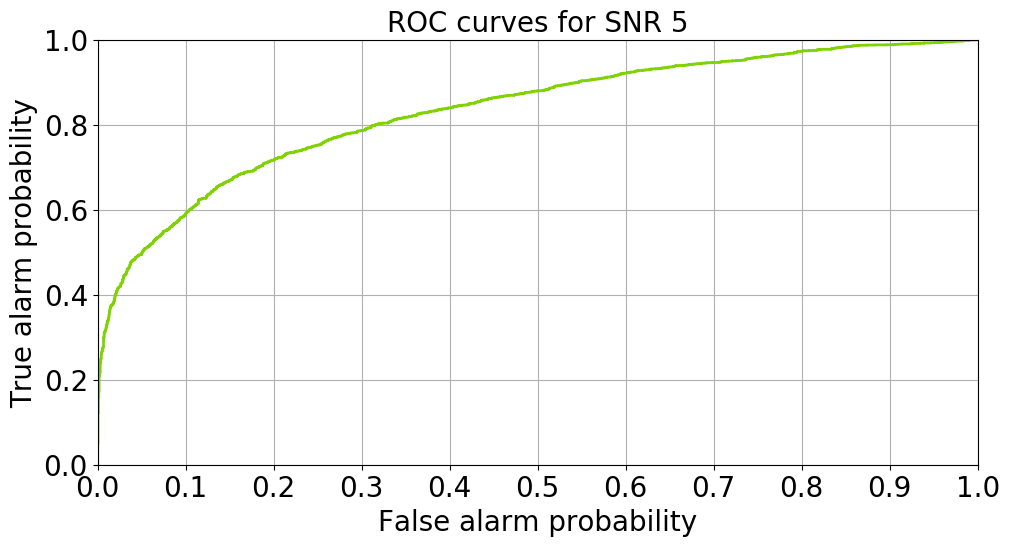

In [17]:
SNRs =[5.0]
fig = plt.figure(figsize=(11,5), dpi= 100, facecolor='w', edgecolor='k')

for i in range(len(SNRs)): 
    j = np.argmin(t_scores[i][:,0])    
    tem_fa, tem_ta, _ = metrics.roc_curve(test_label_saver_for_ROC[i][j][:,1], signal_preds[i][j][:,1])
    plt.plot(tem_fa, tem_ta, linewidth = 2, color = color_shelf(SNRs[i]) , label = 'SNR = %s' %(SNRs[i]))
    plt.xlabel('False alarm probability',fontsize = fontsize)
    plt.ylabel('True alarm probability',fontsize = fontsize)
    plt.title('ROC curves for SNR 5', fontsize = fontsize)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.90, top = 0.95)
    
plt.grid()
#plt.legend(fontsize = fontsize - 5)
ax = plt.gca()
ax.set_xticks(np.arange(11) * 0.1)
#ax.set_xscale('log')
#ax.set_yscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('normal')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('normal')
plt.show()

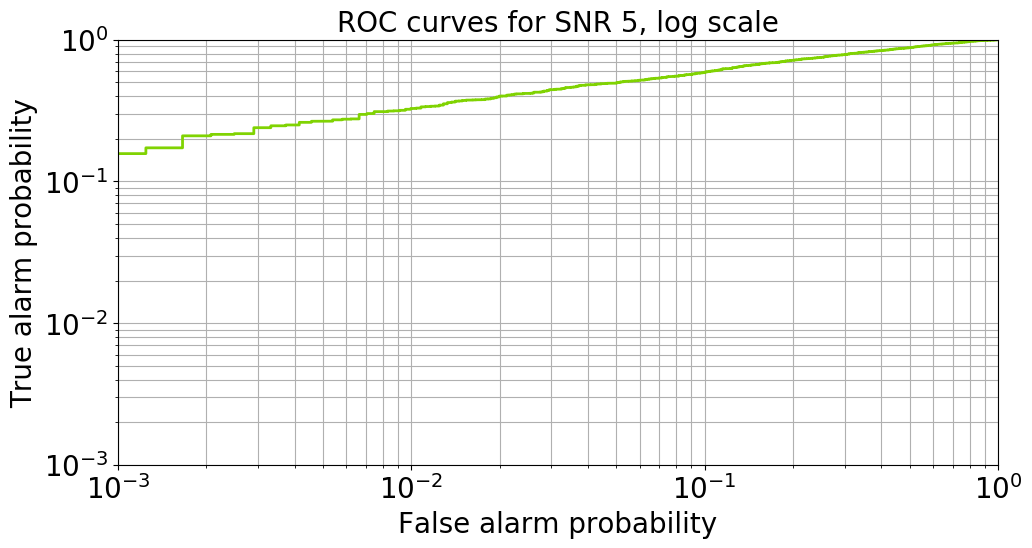

In [21]:
fig = plt.figure(figsize=(11,5), dpi= 100, facecolor='w', edgecolor='k')

for i in range(len(SNRs)): 
    tem_fa, tem_ta, _ = metrics.roc_curve(test_label_saver_for_ROC[i][j][:,1], signal_preds[i][j][:,1])
    plt.plot(tem_fa, tem_ta, linewidth = 2, color = color_shelf(SNRs[i]) , label = 'SNR = %s' %(SNRs[i]))
    plt.xlabel('False alarm probability',fontsize = fontsize)
    plt.ylabel('True alarm probability',fontsize = fontsize)
    plt.title('ROC curves for SNR 5, log scale', fontsize = fontsize)
    plt.xlim([0.001, 1])
    plt.ylim([0.001, 1])
    plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.90, top = 0.95)
    
#plt.legend()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.grid(which = 'both')

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('normal')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('normal')
plt.show()

In [30]:
# function taken from scikit-learn examples
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.PuBu):
    
    
    #fig , axs = plt.subplots(,1, sharex = True, figsize=(22,11), dpi= 100, facecolor='w', edgecolor='k')
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    This function is heavily referenced from https://github.com/mj-will/intro2ml/blob/master/bbh-example.ipynb
    """
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize = 16)
    plt.yticks(tick_marks, classes, fontsize = 16)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i , format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)
    
    accuracy = float(cm[0,0] + cm[1,1]) / cm.sum()  
    text = 'Accuracy:                 {0}%'.format(format(accuracy * 100, '.1f'))     
    plt.text(1.6, -0.45, text, fontsize =16)    
    TPR = cm[1,1] / float(cm[1,0] + cm[1,1])  
    text = 'True Positive Rate:   {0}%'.format(format(TPR * 100, '.1f'))
    plt.text(1.6, -0.3, text, fontsize =16) 
    
    TNR = cm[0,0] / float(cm[0,0] + cm[0,1])
    text = 'True Negative Rate:  {0}%'.format(format(TNR * 100, '.1f'))
    plt.text(1.6, -0.15, text, fontsize =16) 
    
    
    FPR =  cm[0,1] / float(cm[0,0] + cm[0,1])  
    text = 'False Positive Rate:     {0}%'.format(format(FPR * 100, '.1f'))
    plt.text(1.6, 0.0, text, fontsize =16) 
    
    FNR = cm[1,0] / float(cm[1,0] + cm[1,1])
    text = 'False Negative Rate: {0}%'.format(format(FNR * 100, '.1f'))
    plt.text(1.6, 0.15, text, fontsize =16) 
    
    
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label',fontsize = 16)
    plt.show()

# 2. Confusion matrix for a test dataset containing samples randomly drawn from only the rotational waveform dataset which the network did not get to see during training


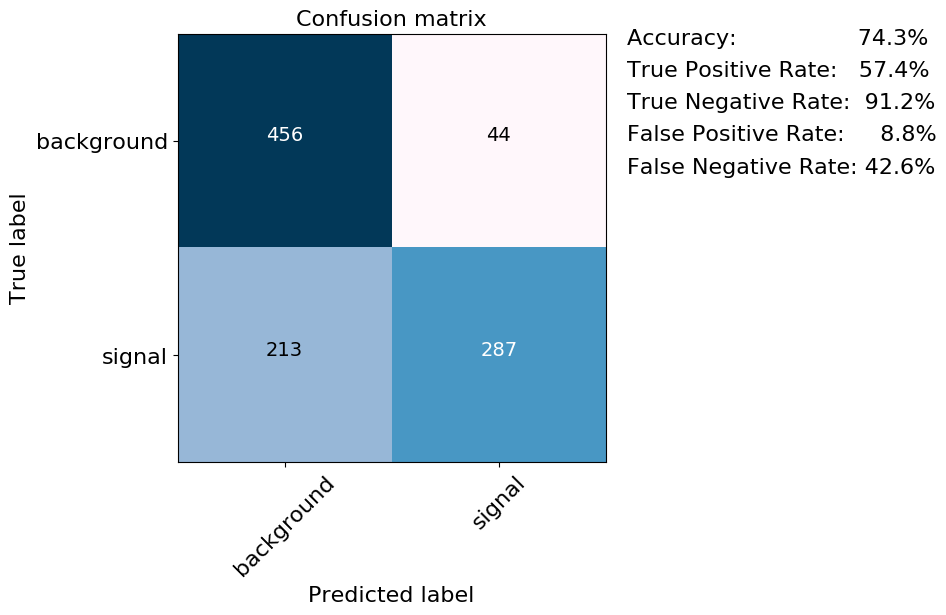

In [42]:
#load the data
fig = plt.figure(figsize=(14,6), dpi= 100, facecolor='w', edgecolor='k')

with open("rotationalresults.pkl") as f:
    pd, tl = pickle.load(f)
    
# cm needs predicted class, rather than probability
y_preds_class = np.argmax(pd, axis =1)
# cal culate teh cm
cm = metrics.confusion_matrix(tl, y_preds_class)
# plot the cm
plot_confusion_matrix(cm, ['background', 'signal'])
    
    
    
    

# 3. Confusion matrix for a test dataset containing samples randomly drawn from only the neutrino driven waveform dataset which the network did not get to see during training.


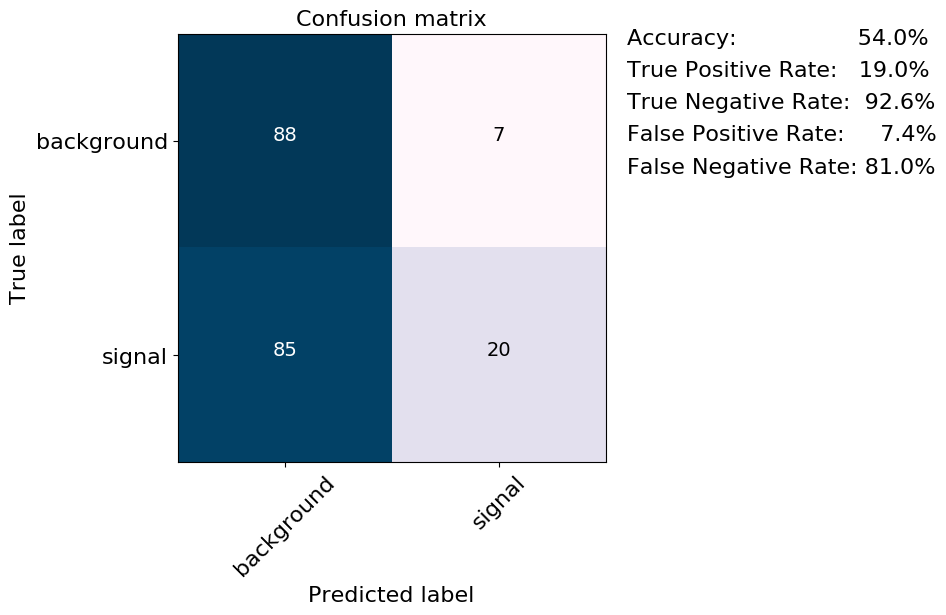

In [45]:
#load the data
fig = plt.figure(figsize=(14,6), dpi= 100, facecolor='w', edgecolor='k')

with open("drivenresults.pkl") as f:
    pd, tl = pickle.load(f)
    
# cm needs predicted class, rather than probability
y_preds_class = np.argmax(pd, axis =1)
# cal culate teh cm
cm = metrics.confusion_matrix(tl, y_preds_class)
# plot the cm
plot_confusion_matrix(cm, ['background', 'signal'])
    
    
    
    

# 4. Confusion matrix for a test dataset containing randomly drawn samples from the entire dataset which the network did not get to see during training.


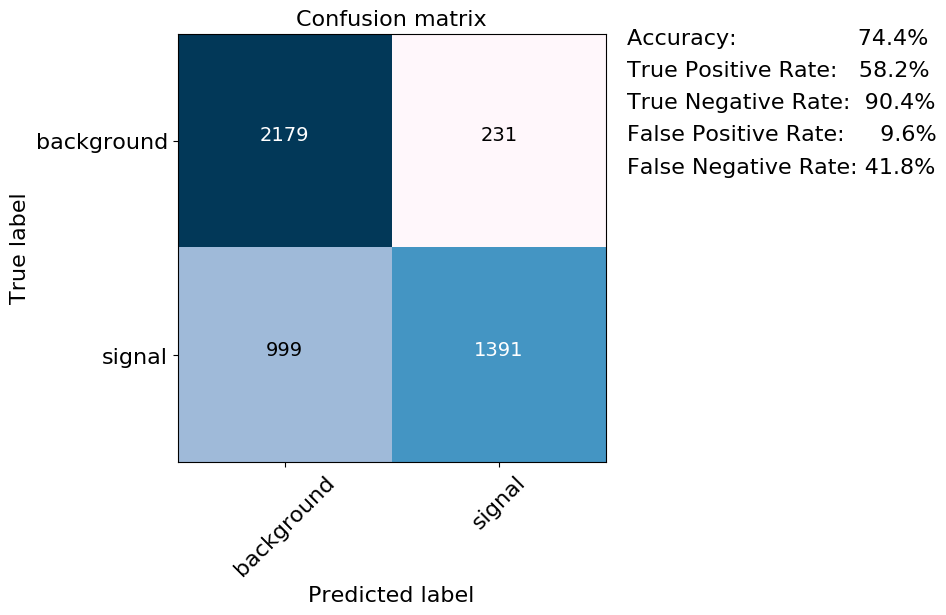

In [46]:
#load the data
fig = plt.figure(figsize=(14,6), dpi= 100, facecolor='w', edgecolor='k')
# cm needs predicted class, rather than probability
y_preds_class = np.argmax(signal_preds[0][j], axis =1)
# cal culate teh cm
cm = metrics.confusion_matrix(test_label_saver_for_ROC[0][j][:,1], y_preds_class)
# plot the cm
plot_confusion_matrix(cm, ['background', 'signal'])


In [31]:
def color_shelf(SNR):
    nf = 255.0
    RGB_choice = {
        1 : [255.0, 206.0, 0.0],
        2 : [49.0, 51.0, 53.0],
        3 : [27.0, 161.0, 226.0],
        4 : [222.0, 93.0, 9.0],
        5 : [128.0, 211.0, 2.0],
        6 : [194.0, 45.0, 240.0],
        7 : [227.0, 37.0, 107.0],
        8 : [255.0, 146.0, 93.0],
        9 : [33.0, 206.0, 142.0],
        10: [70.0, 33.0, 180.0]
    }
    #RGB[SNR]
    RGB = [x /nf for x in RGB_choice[SNR]]
    return RGB

fontsize =20


In [32]:
def plotlossacc_together(history, fontsize, SNR, Loss_top, Loss_bottom, Acc_top, Acc_bottom, tscores):
    fig , axs = plt.subplots(2,1, sharex = True, figsize=(22,11), dpi= 100, facecolor='w', edgecolor='k')
    axs = axs.ravel()
    # plot history
    #fig = plt.figure()
    history_idx = 0
    for history_10 in history:
        counter = 0
        idx = np.argmin(t_scores[history_idx][:,0])
        history_idx += 1
        for history_i in history_10[idx:idx+1]:
            if counter == 0:
                axs[0].plot(np.arange(epochs) + 1, history_i.history['loss'], label = 'Training Loss at SNR = %s' %(SNR + 4), linewidth = 2, linestyle ='dashdot', color = color_shelf(SNR))
                axs[0].plot(np.arange(epochs) + 1, history_i.history['val_loss'], label = 'Validation Loss at SNR = %s' %(SNR + 4), linewidth = 2, linestyle ='-', color = color_shelf(SNR))

                axs[1].plot(np.arange(epochs) + 1, history_i.history['acc'], label = 'Training Accuracy at SNR = %s' %(SNR + 4), linewidth = 2,  linestyle ='dashdot', color =  color_shelf(SNR))
                axs[1].plot(np.arange(epochs) + 1, history_i.history['val_acc'], label = 'Validation Accurarcy at SNR = %s' %(SNR + 4), linewidth = 2, linestyle ='-', color =  color_shelf(SNR))
                # set labels
                axs[0].set_ylabel('Loss', fontsize = fontsize)
                axs[1].set_xlabel('Epoch', fontsize = fontsize)
                axs[1].set_ylabel('Acc', fontsize = fontsize)



                # legends
                #axs[0].legend(fontsize = fontsize - 2, ncol=3)
                #axs[1].legend(fontsize = fontsize - 2, ncol=3)
            else:
                axs[0].plot(np.arange(epochs) + 1, history_i.history['loss'], linewidth = 2, linestyle ='dashdot', color = color_shelf(SNR))
                axs[0].plot(np.arange(epochs) + 1, history_i.history['val_loss'], linewidth = 2, linestyle ='-', color = color_shelf(SNR))

                axs[1].plot(np.arange(epochs) + 1, history_i.history['acc'], linewidth = 2, linestyle ='dashdot', color = color_shelf(SNR))
                axs[1].plot(np.arange(epochs) + 1, history_i.history['val_acc'], linewidth = 2, linestyle ='-', color = color_shelf(SNR))
                # set labels
                axs[0].set_ylabel('Loss', fontsize = fontsize)
                axs[1].set_xlabel('Epoch', fontsize = fontsize)
                axs[1].set_ylabel('Acc', fontsize = fontsize)



                # legends
                #axs[0].legend(fontsize = fontsize - 5)
                #axs[1].legend(fontsize = fontsize - 5)
            counter += 1
        SNR +=1    
    # grids
    axs[0].grid()
    axs[1].grid()
    axs[0].set_xlim([1, epochs])
    axs[0].set_ylim(top = Loss_top, bottom = Loss_bottom)
    axs[0].set_xticks(np.arange(epochs) +1)
    axs[1].set_xlim([1, epochs])
    axs[1].set_ylim(top = Acc_top, bottom = Acc_bottom)
    axs[1].set_xticks(np.arange(epochs) +1)
    plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.90, top = 0.95)
    for ax in axs:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            tick.label1.set_fontweight('normal')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            tick.label1.set_fontweight('normal')
    plt.show()


# 5. plots of loss / validation loss; accuracy / validation accuracy for SNR = 5 

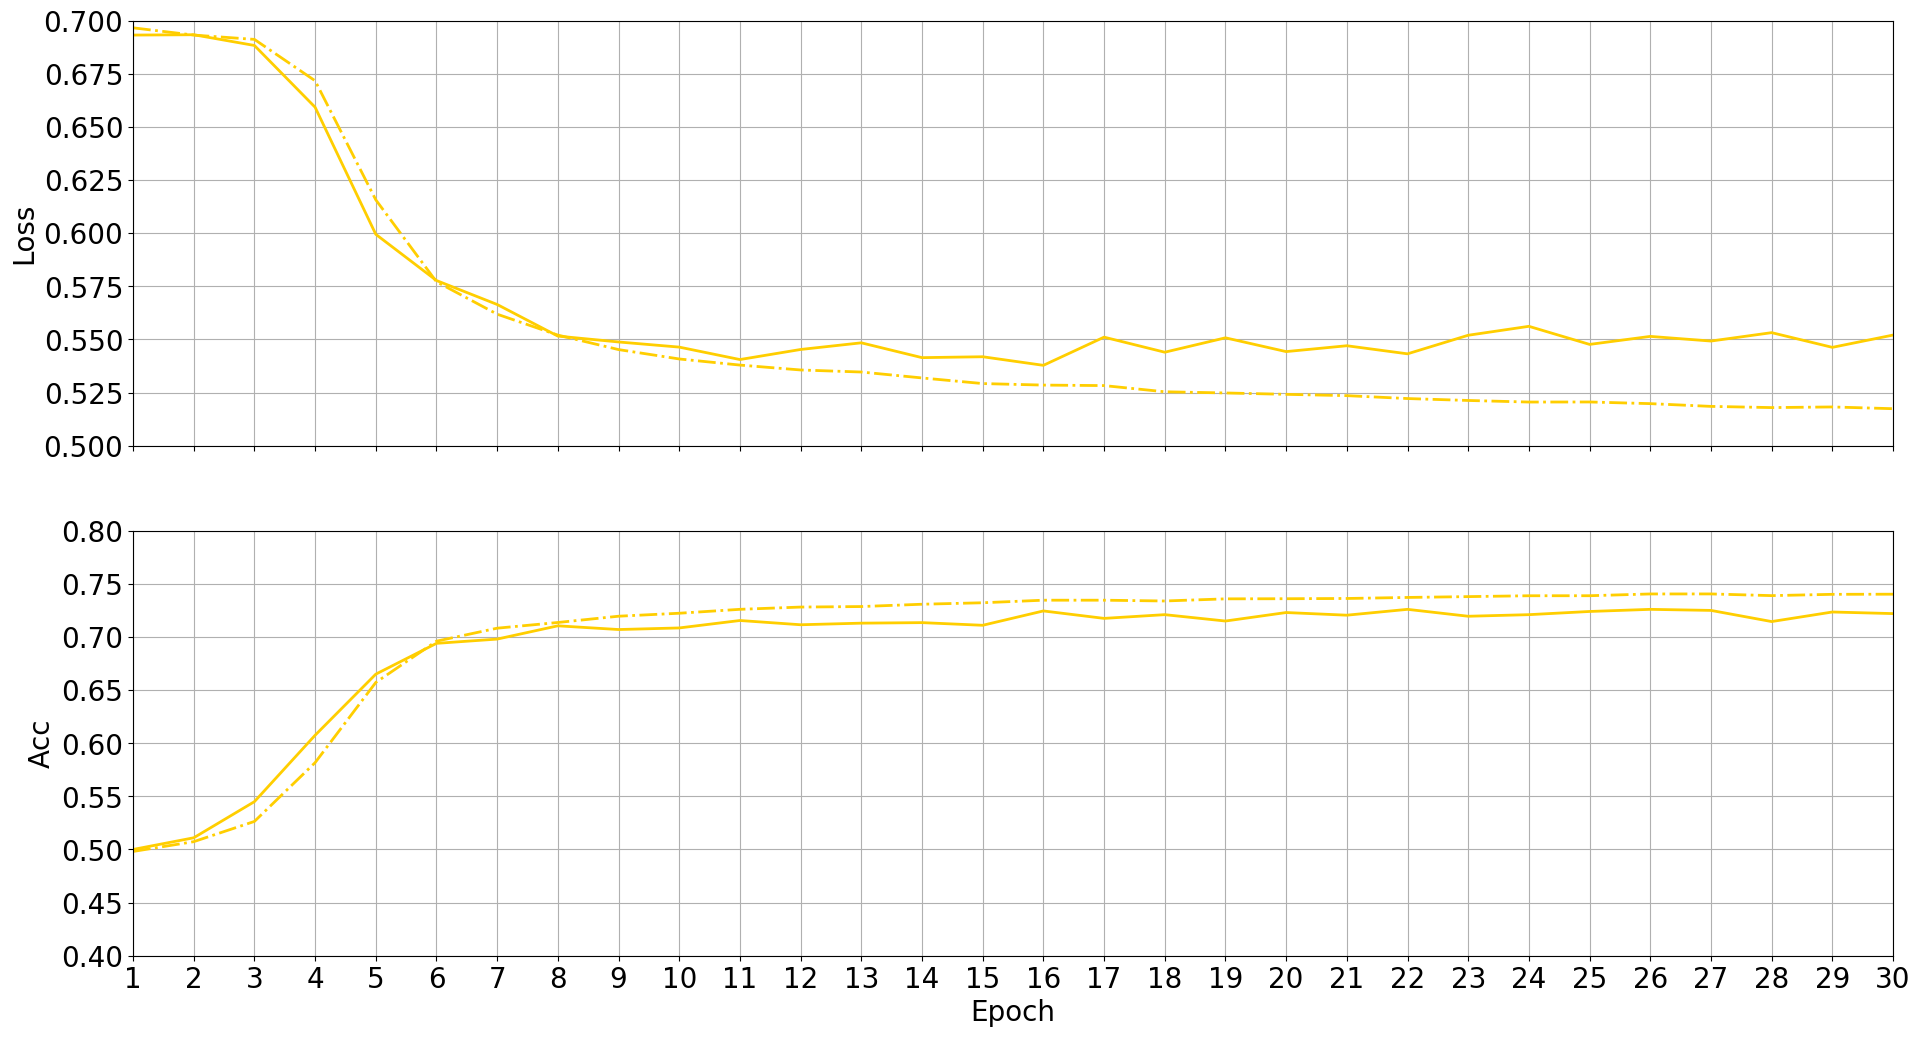

In [28]:
fontsize = 20
epochs = 30
Loss_top = 0.7
Loss_bottom = 0.5
Acc_top = 0.8
Acc_bottom = 0.4
plotlossacc_together(history, fontsize, 1, Loss_top, Loss_bottom, Acc_top, Acc_bottom, t_scores)

In [29]:
def plot_roc(test_label, signal_preds, SNR, plot):
    if plot == True:
        fig = plt.figure()
    fa = []#[[] for i in range(len(test_label))]
    ta = []#[[] for i in range(len(test_label))]
    for i, j in zip(test_label, signal_preds):
        tem_fa, tem_ta, _ = metrics.roc_curve(i[:,1], j[:,1])
        fa.append(tem_fa)
        ta.append(tem_ta)
        if plot == True:
            plt.plot(tem_fa, tem_ta, linewidth = 2, color = 'b')
            plt.xlabel('False alarm probability',fontsize = fontsize)
            plt.ylabel('True alarm probability',fontsize = fontsize)
            plt.title('ROC curve for SNR %s'%(SNR), fontsize = fontsize)
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.90, top = 0.95)
            
             
    if plot == True:            
        plt.grid()
        ax = plt.gca()
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            tick.label1.set_fontweight('normal')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            tick.label1.set_fontweight('normal')
        plt.show()
    return fa, ta


def interpta(fa, ta, given_FAP):
     
    ta_fun = interpolate.interp1d(fa, ta)
    
    ta_interp = ta_fun(given_FAP)
    
    return ta_interp

In [47]:
with open("./Data/extrawaves_neutrinos.pkl") as f: 
    ew = pickle.load(f)[0]


# 6. Strange waveform from the neutrino data set that is discarded

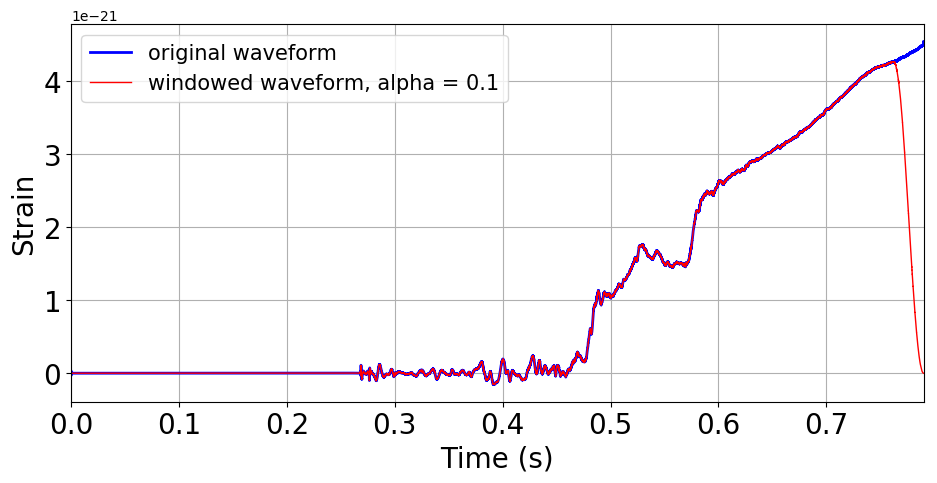

In [67]:
fig = plt.figure(figsize=(11,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(ets[19], ew[19], linewidth = 2, color = 'b', label = 'original waveform')
windows = signal.tukey(len(ew[19]), alpha = 0.1)
plt.plot(ets[19], windows * ew[19], linewidth = 1, color = 'r', label = 'windowed waveform, alpha = 0.1')

plt.legend(loc = 'upper left', fontsize = 15)
plt.grid()
plt.xlabel('Time (s)', fontsize = fontsize)
plt.ylabel('Strain', fontsize = fontsize)
plt.xlim([ets[19][0], ets[19][-1]])
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('normal')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('normal')
plt.show()

    